In [36]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
prior10mean = pd.read_csv('C:\\Users\\Francisyey\\research\\meanandstd_all_prior10days.csv')
prior10mean

,TE_tp_1of3_sr_1sec_mean,TE_tp_2of3_sr_1sec_mean,TE_tp_3of3_sr_1sec_mean,TE_tp_1of3_sr_2sec_mean,TE_tp_2of3_sr_2sec_mean,TE_tp_3of3_sr_2sec_mean,TE_tp_1of3_sr_3sec_mean,TE_tp_2of3_sr_3sec_mean,TE_tp_3of3_sr_3sec_mean,TE_tp_1of3_sr_5sec_mean,...,TE_tp_1of3_sr_30sec_std,TE_tp_2of3_sr_30sec_std,TE_tp_3of3_sr_30sec_std,TE_tp_1of3_sr_1min_std,TE_tp_2of3_sr_1min_std,TE_tp_3of3_sr_1min_std,TE_tp_1of3_sr_2min_std,TE_tp_2of3_sr_2min_std,TE_tp_3of3_sr_2min_std,10daysbefore
0,0.065500,0.040319,0.047777,0.088074,0.057137,0.064527,0.099775,0.067341,0.074576,0.109629,...,0.119455,0.119649,0.119475,0.156827,0.158234,0.156595,0.204391,0.204151,0.205046,20030924
1,0.065090,0.041987,0.047698,0.087812,0.058913,0.064692,0.099293,0.069061,0.074655,0.109408,...,0.120123,0.119188,0.119864,0.156992,0.157431,0.157313,0.204239,0.204315,0.205720,20030925
2,0.065803,0.042413,0.048639,0.088819,0.059157,0.065641,0.100199,0.069331,0.075397,0.110241,...,0.120555,0.118614,0.119929,0.157346,0.157009,0.157080,0.204004,0.204618,0.205661,20030926
3,0.066565,0.043566,0.049204,0.089660,0.060844,0.066311,0.100654,0.070821,0.075716,0.111002,...,0.120687,0.118178,0.120453,0.158263,0.156395,0.158090,0.205136,0.204491,0.207211,20030929
4,0.067265,0.045141,0.050244,0.090214,0.062627,0.067598,0.101192,0.072785,0.076913,0.111540,...,0.120953,0.118346,0.120348,0.158027,0.156237,0.158197,0.204723,0.204233,0.206786,20030930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,0.094665,0.071794,0.082014,0.107612,0.083723,0.092569,0.112795,0.091633,0.097179,0.115969,...,0.131293,0.127650,0.127268,0.166723,0.163245,0.164055,0.209738,0.208948,0.210879,20201224
4339,0.093450,0.070084,0.074076,0.106965,0.082281,0.084042,0.112266,0.089834,0.088108,0.115961,...,0.130561,0.126952,0.127811,0.166487,0.162287,0.163748,0.209975,0.207441,0.210553,20201228
4340,0.093517,0.068699,0.072995,0.107171,0.080827,0.083377,0.112502,0.088278,0.087348,0.115834,...,0.130529,0.126720,0.127744,0.166512,0.162150,0.163513,0.210114,0.208141,0.209441,20201229
4341,0.092590,0.068586,0.071928,0.106256,0.080961,0.082305,0.111632,0.088144,0.086421,0.114734,...,0.130541,0.125944,0.127559,0.166552,0.161426,0.163631,0.209897,0.207114,0.209333,20201230


In [3]:
columns_to_average = ['TE_tp_1of3_sr_1sec_mean','TE_tp_2of3_sr_1sec_mean','TE_tp_3of3_sr_1sec_mean',
                      'TE_tp_1of3_sr_2sec_mean','TE_tp_2of3_sr_2sec_mean','TE_tp_3of3_sr_2sec_mean',
                      'TE_tp_1of3_sr_3sec_mean','TE_tp_2of3_sr_3sec_mean','TE_tp_3of3_sr_3sec_mean',
                      'TE_tp_1of3_sr_5sec_mean','TE_tp_2of3_sr_5sec_mean','TE_tp_3of3_sr_5sec_mean',
                      'TE_tp_1of3_sr_6sec_mean','TE_tp_2of3_sr_6sec_mean','TE_tp_3of3_sr_6sec_mean']

In [4]:
column_mean = prior10mean[columns_to_average].mean(axis=1)
prior10mean_average = pd.DataFrame({'Date': prior10mean['10daysbefore'], 'Average_TE_prior10days': column_mean})
prior10mean_average['Date'] = prior10mean_average['Date'].astype(int)
prior10mean_average

,Date,Average_TE_prior10days
0,20030924,0.076713
1,20030925,0.077156
2,20030926,0.077854
3,20030929,0.078765
4,20030930,0.079933
...,...,...
4338,20201224,0.096704
4339,20201228,0.093145
4340,20201229,0.092619
4341,20201230,0.092025


In [5]:
prior10_density = pd.read_csv('C:\\Users\\Francisyey\\research\\20201231_Stand_sumanddensity.csv')
prior10_density

,DATE_dat,N_Firms,TE_tp_1of3_sr_1sec_standarized_sum,TE_tp_2of3_sr_1sec_standarized_sum,TE_tp_3of3_sr_1sec_standarized_sum,TE_tp_1of3_sr_2sec_standarized_sum,TE_tp_2of3_sr_2sec_standarized_sum,TE_tp_3of3_sr_2sec_standarized_sum,TE_tp_1of3_sr_3sec_standarized_sum,TE_tp_2of3_sr_3sec_standarized_sum,...,TE_tp_3of3_sr_15sec_standarized_density,TE_tp_1of3_sr_30sec_standarized_density,TE_tp_2of3_sr_30sec_standarized_density,TE_tp_3of3_sr_30sec_standarized_density,TE_tp_1of3_sr_1min_standarized_density,TE_tp_2of3_sr_1min_standarized_density,TE_tp_3of3_sr_1min_standarized_density,TE_tp_1of3_sr_2min_standarized_density,TE_tp_2of3_sr_2min_standarized_density,TE_tp_3of3_sr_2min_standarized_density
0,20030924.0,512,-17436.392516,144315.714895,45540.437793,-16267.716672,126987.320217,64716.485609,-13138.797829,112058.304111,...,0.005572,0.073622,0.004708,0.010449,-0.002520,-0.010241,-0.051025,-0.016451,-0.075772,-0.023344
1,20030925.0,512,76948.928033,54102.042245,59920.945461,87330.855022,46952.917955,37158.218113,66558.026801,51287.061996,...,0.114466,0.160480,0.050991,0.070480,0.076976,0.063446,0.062790,0.018439,0.017251,-0.016415
2,20030926.0,511,90315.499949,65618.952800,64999.532442,74603.748689,86338.181283,68414.824005,62860.290005,53896.345636,...,-0.029561,-0.116184,0.044190,-0.008345,-0.139289,0.023616,-0.083273,-0.094824,-0.011063,-0.106327
3,20030929.0,511,42053.615355,55583.895918,43812.379288,44298.108794,60288.122842,37914.171073,38064.466090,49610.247332,...,-0.043629,0.047946,-0.053623,-0.025599,-0.059355,-0.010537,-0.040486,-0.055392,-0.054276,-0.026739
4,20030930.0,511,88839.160062,93104.539653,101720.594862,65155.664646,97482.747900,86036.203692,56769.759106,76864.859662,...,0.094052,-0.118665,-0.007640,0.067928,-0.073321,-0.030009,0.067877,-0.066608,-0.045434,-0.061350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,20201224.0,510,-61775.964816,-82856.928068,-433877.829221,-39488.162992,-64076.123598,-400307.813879,-34758.275653,-75903.222548,...,-0.684010,0.035403,0.046641,-0.352356,-0.013819,0.130808,-0.193569,-0.060244,0.169143,-0.071851
4339,20201228.0,510,-19684.571210,-38238.218547,-25456.449537,-12259.969126,-34442.066720,-4178.304647,-11959.375462,-35539.623783,...,0.106430,0.097526,0.024209,0.097599,0.072948,-0.008752,0.060012,-0.030204,-0.025477,0.020582
4340,20201229.0,510,-22470.091190,9969.030228,13815.778510,-27896.543274,23701.194299,20705.449225,-20161.748957,13723.881494,...,0.062002,-0.025953,0.011832,0.026024,-0.006520,0.024285,-0.012029,-0.032413,-0.014722,-0.039684
4341,20201230.0,510,-46806.373214,-19323.752234,888.442878,-43004.544933,-20476.082307,-850.734652,-29318.250502,-12745.611023,...,0.045417,0.072740,0.004600,0.014161,0.043782,-0.014433,0.036595,-0.045273,-0.052714,0.028926


In [6]:
columns_to_average = ['TE_tp_1of3_sr_1sec_standarized_density','TE_tp_2of3_sr_1sec_standarized_density','TE_tp_3of3_sr_1sec_standarized_density',
                      'TE_tp_1of3_sr_2sec_standarized_density','TE_tp_2of3_sr_2sec_standarized_density','TE_tp_3of3_sr_2sec_standarized_density',
                      'TE_tp_1of3_sr_3sec_standarized_density','TE_tp_2of3_sr_3sec_standarized_density','TE_tp_3of3_sr_3sec_standarized_density',
                      'TE_tp_1of3_sr_5sec_standarized_density','TE_tp_2of3_sr_5sec_standarized_density','TE_tp_3of3_sr_5sec_standarized_density',
                      'TE_tp_1of3_sr_6sec_standarized_density','TE_tp_2of3_sr_6sec_standarized_density','TE_tp_3of3_sr_6sec_standarized_density']
column_mean = prior10_density[columns_to_average].mean(axis = 1)
prior10_density_average = pd.DataFrame({'Date': prior10_density['DATE_dat'], 'Average_standarized_density': column_mean})
prior10_density_average['Date'] = prior10_density_average['Date'].astype(int)
prior10_density_average

,Date,Average_standarized_density
0,20030924,0.171397
1,20030925,0.206927
2,20030926,0.218197
3,20030929,0.141094
4,20030930,0.262545
...,...,...
4338,20201224,-0.621341
4339,20201228,-0.059443
4340,20201229,0.020631
4341,20201230,-0.055955


In [7]:
columns_to_average = ['TE_tp_1of3_sr_1sec_std','TE_tp_2of3_sr_1sec_std','TE_tp_3of3_sr_1sec_std',
                      'TE_tp_1of3_sr_2sec_std','TE_tp_2of3_sr_2sec_std','TE_tp_3of3_sr_2sec_std',
                      'TE_tp_1of3_sr_3sec_std','TE_tp_2of3_sr_3sec_std','TE_tp_3of3_sr_3sec_std',
                      'TE_tp_1of3_sr_5sec_std','TE_tp_2of3_sr_5sec_std','TE_tp_3of3_sr_5sec_std',
                      'TE_tp_1of3_sr_6sec_std','TE_tp_2of3_sr_6sec_std','TE_tp_3of3_sr_6sec_std']
column_std = prior10mean[columns_to_average].mean(axis=1)
prior10std_average = pd.DataFrame({'Date': prior10mean['10daysbefore'], 'Average_TEstd_prior10days': column_std})
prior10std_average['Date'] = prior10mean_average['Date'].astype(int)
prior10std_average

,Date,Average_TEstd_prior10days
0,20030924,0.049937
1,20030925,0.050135
2,20030926,0.050227
3,20030929,0.050410
4,20030930,0.050399
...,...,...
4338,20201224,0.067319
4339,20201228,0.068400
4340,20201229,0.068310
4341,20201230,0.068227


In [8]:
everyday_TEmean = pd.read_csv('C:\\Users\\Francisyey\\research\\everyday_mean.csv')
everyday_TEmean

,TE_tp_1of3_sr_1sec_mean,TE_tp_2of3_sr_1sec_mean,TE_tp_3of3_sr_1sec_mean,TE_tp_1of3_sr_2sec_mean,TE_tp_2of3_sr_2sec_mean,TE_tp_3of3_sr_2sec_mean,TE_tp_1of3_sr_3sec_mean,TE_tp_2of3_sr_3sec_mean,TE_tp_3of3_sr_3sec_mean,TE_tp_1of3_sr_5sec_mean,...,TE_tp_1of3_sr_30sec_std,TE_tp_2of3_sr_30sec_std,TE_tp_3of3_sr_30sec_std,TE_tp_1of3_sr_1min_std,TE_tp_2of3_sr_1min_std,TE_tp_3of3_sr_1min_std,TE_tp_1of3_sr_2min_std,TE_tp_2of3_sr_2min_std,TE_tp_3of3_sr_2min_std,Date
0,0.067136,0.041648,0.054333,0.087895,0.059860,0.073248,0.102042,0.071308,0.081050,0.111317,...,0.116594,0.120615,0.119065,0.156132,0.159294,0.154274,0.200726,0.201703,0.199638,20030910
1,0.068807,0.044642,0.045932,0.092845,0.064167,0.061201,0.103197,0.076136,0.074780,0.115302,...,0.118777,0.124539,0.117178,0.153876,0.160529,0.157796,0.206253,0.200039,0.205523,20030911
2,0.071031,0.039272,0.051302,0.093410,0.056443,0.069966,0.107910,0.064671,0.078331,0.111762,...,0.121224,0.121905,0.114579,0.156230,0.159682,0.150922,0.203723,0.205383,0.192542,20030912
3,0.065622,0.034972,0.044452,0.091862,0.052949,0.059591,0.102735,0.060631,0.069385,0.110487,...,0.118511,0.120123,0.123813,0.156597,0.158105,0.157761,0.205982,0.206507,0.207581,20030915
4,0.055858,0.034404,0.054417,0.079547,0.049649,0.068572,0.091482,0.058957,0.080044,0.104648,...,0.121442,0.115441,0.116253,0.158492,0.156339,0.153407,0.201404,0.200957,0.201748,20030916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,0.079558,0.056125,0.001234,0.096448,0.068989,0.003982,0.102492,0.072493,0.001778,0.110625,...,0.127741,0.120598,0.127109,0.165240,0.158168,0.158499,0.209668,0.195622,0.207381,20201224
4349,0.088707,0.062951,0.068920,0.103541,0.074456,0.083046,0.108750,0.080944,0.086570,0.110535,...,0.129814,0.127574,0.128440,0.166061,0.165284,0.167928,0.209785,0.216032,0.208120,20201228
4350,0.088126,0.070547,0.075775,0.099421,0.086211,0.088291,0.106592,0.091715,0.095170,0.108356,...,0.130211,0.124058,0.122171,0.165039,0.162769,0.163091,0.204822,0.202666,0.208884,20201229
4351,0.081378,0.065021,0.072105,0.094283,0.076343,0.082105,0.102986,0.084962,0.090584,0.105178,...,0.132563,0.126613,0.125511,0.171242,0.162929,0.168398,0.210846,0.210857,0.214258,20201230


In [9]:
columns_to_average = ['TE_tp_1of3_sr_1sec_mean','TE_tp_2of3_sr_1sec_mean','TE_tp_3of3_sr_1sec_mean',
                      'TE_tp_1of3_sr_2sec_mean','TE_tp_2of3_sr_2sec_mean','TE_tp_3of3_sr_2sec_mean',
                      'TE_tp_1of3_sr_3sec_mean','TE_tp_2of3_sr_3sec_mean','TE_tp_3of3_sr_3sec_mean',
                      'TE_tp_1of3_sr_5sec_mean','TE_tp_2of3_sr_5sec_mean','TE_tp_3of3_sr_5sec_mean',
                      'TE_tp_1of3_sr_6sec_mean','TE_tp_2of3_sr_6sec_mean','TE_tp_3of3_sr_6sec_mean']
column_mean = everyday_TEmean[columns_to_average].mean(axis=1)
TEmean_today = pd.DataFrame({'Date': everyday_TEmean['Date'], 'Average_TE_today': column_mean})
TEmean_today['Date'] = TEmean_today['Date'].astype(int)
print(TEmean_today)

          Date  Average_TE_today
0     20030910          0.080200
1     20030911          0.080364
2     20030912          0.079152
3     20030915          0.073773
4     20030916          0.073389
...        ...               ...
4348  20201224          0.057959
4349  20201228          0.089406
4350  20201229          0.093756
4351  20201230          0.088164
4352  20201231          0.087015

[4353 rows x 2 columns]


In [10]:
columns_to_average = ['TE_tp_1of3_sr_1sec_std','TE_tp_2of3_sr_1sec_std','TE_tp_3of3_sr_1sec_std',
                      'TE_tp_1of3_sr_2sec_std','TE_tp_2of3_sr_2sec_std','TE_tp_3of3_sr_2sec_std',
                      'TE_tp_1of3_sr_3sec_std','TE_tp_2of3_sr_3sec_std','TE_tp_3of3_sr_3sec_std',
                      'TE_tp_1of3_sr_5sec_std','TE_tp_2of3_sr_5sec_std','TE_tp_3of3_sr_5sec_std',
                      'TE_tp_1of3_sr_6sec_std','TE_tp_2of3_sr_6sec_std','TE_tp_3of3_sr_6sec_std']
column_mean = everyday_TEmean[columns_to_average].mean(axis=1)
TEstd_today = pd.DataFrame({'Date': everyday_TEmean['Date'], 'TE_std_today': column_mean})
TEstd_today['Date'] = TEmean_today['Date'].astype(int)
print(TEstd_today)

          Date  TE_std_today
0     20030910      0.049287
1     20030911      0.050304
2     20030912      0.049561
3     20030915      0.050133
4     20030916      0.049208
...        ...           ...
4348  20201224      0.059904
4349  20201228      0.067790
4350  20201229      0.068722
4351  20201230      0.066342
4352  20201231      0.067347

[4353 rows x 2 columns]


In [11]:
features = pd.merge(right = prior10mean_average, left = prior10_density_average, how = 'inner', on= 'Date')
features = pd.merge(right = features, left = prior10std_average, how = 'inner', on= 'Date')
features = pd.merge(right = features, left = TEmean_today, how = 'inner', on= 'Date')
features = pd.merge(right = features, left = TEstd_today, how = 'inner', on= 'Date')
features

,Date,TE_std_today,Average_TE_today,Average_TEstd_prior10days,Average_standarized_density,Average_TE_prior10days
0,20030924,0.050045,0.084633,0.049937,0.171397,0.076713
1,20030925,0.050368,0.087342,0.050135,0.206927,0.077156
2,20030926,0.050482,0.088300,0.050227,0.218197,0.077854
3,20030929,0.050117,0.085469,0.050410,0.141094,0.078765
4,20030930,0.050216,0.092382,0.050399,0.262545,0.079933
...,...,...,...,...,...,...
4338,20201224,0.059904,0.057959,0.067319,-0.621341,0.096704
4339,20201228,0.067790,0.089406,0.068400,-0.059443,0.093145
4340,20201229,0.068722,0.093756,0.068310,0.020631,0.092619
4341,20201230,0.066342,0.088164,0.068227,-0.055955,0.092025


In [12]:
features_columns = ['TE_std_today','Average_TE_today',  'Average_TEstd_prior10days','Average_standarized_density','Average_TE_prior10days']
for i in features_columns:
    temp = i + '_norm'
    features[temp] = (features[i] - features[i].min()) / (features[i].max() - features[i].min()) # normalization
features = features[['Date','TE_std_today_norm','Average_TE_today_norm', 'Average_TEstd_prior10days_norm','Average_standarized_density_norm','Average_TE_prior10days_norm']]
features

,Date,TE_std_today_norm,Average_TE_today_norm,Average_TEstd_prior10days_norm,Average_standarized_density_norm,Average_TE_prior10days_norm
0,20030924,0.024665,0.396617,0.007004,0.550126,0.243044
1,20030925,0.030001,0.421477,0.012742,0.570775,0.248736
2,20030926,0.031879,0.430271,0.015431,0.577325,0.257695
3,20030929,0.025864,0.404285,0.020764,0.532515,0.269392
4,20030930,0.027491,0.467743,0.020432,0.603098,0.284387
...,...,...,...,...,...,...
4338,20201224,0.187274,0.151779,0.512573,0.089414,0.499708
4339,20201228,0.317320,0.440427,0.543996,0.415970,0.454013
4340,20201229,0.332700,0.480357,0.541396,0.462506,0.447261
4341,20201230,0.293440,0.429027,0.538983,0.417997,0.439634


In [13]:
ff = pd.read_csv('C:\\Users\\Francisyey\\research\\FF_extracted.csv')
ff.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
ff[['Mkt-RF', 'SMB', 'HML', 'RF']] = ff[['Mkt-RF', 'SMB', 'HML', 'RF']]/100
ff = ff[['Date','Mkt-RF']]
ff

,Date,Mkt-RF
0,19260701,0.0010
1,19260702,0.0045
2,19260706,0.0017
3,19260707,0.0009
4,19260708,0.0021
...,...,...
25538,20230725,0.0025
25539,20230726,0.0002
25540,20230727,-0.0074
25541,20230728,0.0114


In [14]:
df_merged = pd.merge(right = features, left = ff, how = 'inner', on = 'Date')
df_merged

,Date,Mkt-RF,TE_std_today_norm,Average_TE_today_norm,Average_TEstd_prior10days_norm,Average_standarized_density_norm,Average_TE_prior10days_norm
0,20030924,-0.0188,0.024665,0.396617,0.007004,0.550126,0.243044
1,20030925,-0.0081,0.030001,0.421477,0.012742,0.570775,0.248736
2,20030926,-0.0084,0.031879,0.430271,0.015431,0.577325,0.257695
3,20030929,0.0098,0.025864,0.404285,0.020764,0.532515,0.269392
4,20030930,-0.0096,0.027491,0.467743,0.020432,0.603098,0.284387
...,...,...,...,...,...,...,...
4338,20201224,0.0021,0.187274,0.151779,0.512573,0.089414,0.499708
4339,20201228,0.0046,0.317320,0.440427,0.543996,0.415970,0.454013
4340,20201229,-0.0040,0.332700,0.480357,0.541396,0.462506,0.447261
4341,20201230,0.0027,0.293440,0.429027,0.538983,0.417997,0.439634


In [29]:
def map_to_deciles(x):
    return pd.qcut(x, 4, labels=False, duplicates='raise') + 1
df_merged['Mkt_RF_quartile'] = df_merged['Mkt-RF'].transform(map_to_deciles)
df_merged

,Date,Mkt-RF,TE_std_today_norm,Average_TE_today_norm,Average_TEstd_prior10days_norm,Average_standarized_density_norm,Average_TE_prior10days_norm,Mkt-RF_quartile,Mkt_RF_quartile
0,20030924,-0.0188,0.024665,0.396617,0.007004,0.550126,0.243044,1,1
1,20030925,-0.0081,0.030001,0.421477,0.012742,0.570775,0.248736,1,1
2,20030926,-0.0084,0.031879,0.430271,0.015431,0.577325,0.257695,1,1
3,20030929,0.0098,0.025864,0.404285,0.020764,0.532515,0.269392,4,4
4,20030930,-0.0096,0.027491,0.467743,0.020432,0.603098,0.284387,1,1
...,...,...,...,...,...,...,...,...,...
4338,20201224,0.0021,0.187274,0.151779,0.512573,0.089414,0.499708,3,3
4339,20201228,0.0046,0.317320,0.440427,0.543996,0.415970,0.454013,3,3
4340,20201229,-0.0040,0.332700,0.480357,0.541396,0.462506,0.447261,2,2
4341,20201230,0.0027,0.293440,0.429027,0.538983,0.417997,0.439634,3,3


In [30]:
df_merged['Mkt_RF_quartile'].value_counts()

Mkt_RF_quartile
1    1097
2    1083
3    1082
4    1081
Name: count, dtype: int64

In [37]:
X = df_merged[['TE_std_today_norm', 'Average_TE_today_norm', 'Average_TEstd_prior10days_norm', 'Average_standarized_density_norm', 'Average_TE_prior10days_norm']]
y = df_merged['Mkt-RF_quartile']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled

,TE_std_today_norm,Average_TE_today_norm,Average_TEstd_prior10days_norm,Average_standarized_density_norm,Average_TE_prior10days_norm
0,-0.518992,-0.692643,-0.398825,-0.415416,-0.517795
1,-1.061351,-2.634136,-0.477079,-5.255379,0.381692
2,0.072976,-0.511913,-0.295922,-0.076528,-0.536773
3,-0.154734,-0.378111,-0.083178,0.204141,-0.579832
4,-0.396368,0.215279,-0.274015,-1.039004,0.908170
...,...,...,...,...,...
3469,0.012162,0.395690,-0.294859,1.214298,-0.338358
3470,-1.068203,-0.581212,-1.073740,-0.563975,-0.337043
3471,1.167656,1.182585,0.452522,1.523377,0.344202
3472,0.537432,1.034332,0.447825,0.600542,0.773034


In [44]:
def evaluate_model(features):
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    scores = cross_val_score(model, X_train_scaled[features], y_train, cv=5, scoring='accuracy')
    return np.mean(scores)

current_features = X_train_scaled.columns.tolist()
best_score = 0
best_features = current_features.copy()

while current_features:
    scores_with_features = []
    for feature in current_features:
        temp_features = current_features.copy()
        temp_features.remove(feature)
        score = evaluate_model(temp_features)
        scores_with_features.append((score, feature))
    
    scores_with_features.sort(reverse=True)  
    if scores_with_features[0][0] > best_score:
        best_score = scores_with_features[0][0]
        feature_to_remove = scores_with_features[-1][1]
        current_features.remove(feature_to_remove)
        best_features = current_features.copy()
        print(f"Removed {feature_to_remove}, New Best Score: {best_score}, Remaining Features: {best_features}")
    else:
        break  

final_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
final_model.fit(X_train_scaled[best_features], y_train)




Removed Average_TE_prior10days_norm, New Best Score: 0.3471544378330189, Remaining Features: ['TE_std_today_norm', 'Average_TE_today_norm', 'Average_TEstd_prior10days_norm', 'Average_standarized_density_norm']


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [45]:
feature_importances = pd.DataFrame(final_model.coef_, columns=best_features)
print(feature_importances)


   TE_std_today_norm  Average_TE_today_norm  Average_TEstd_prior10days_norm  \
0           0.327178               0.173930                       -0.284038   
1          -0.030383              -0.068606                       -0.071143   
2           0.003396              -0.162365                       -0.089074   
3          -0.300192               0.057041                        0.444254   

   Average_standarized_density_norm  
0                          0.257811  
1                         -0.018125  
2                         -0.125113  
3                         -0.114573  


Text(0, 0.5, 'Error Rate')

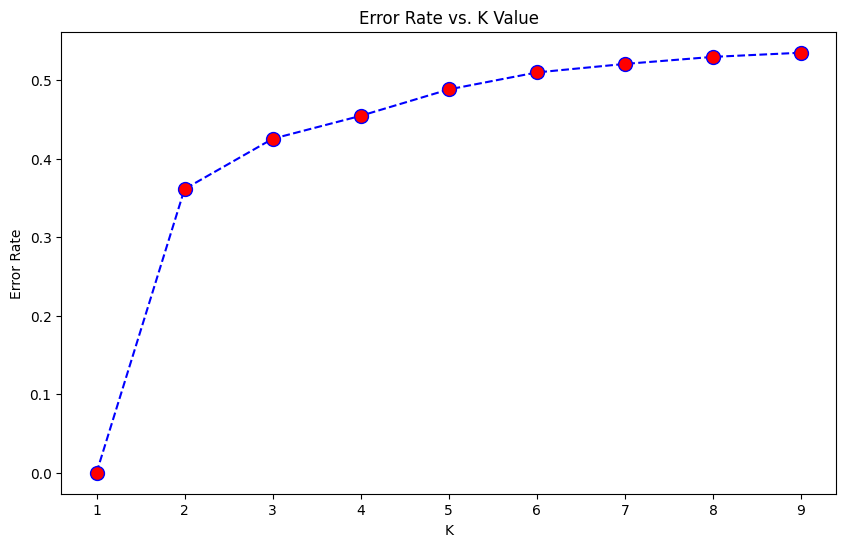

In [48]:
X = df_merged[['Average_standarized_density_norm', 
               'Average_TE_today_norm', 'TE_std_today_norm','Average_TEstd_prior10days_norm']]
Y = df_merged['Mkt-RF_quartile']

error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, Y)
    pred_i = knn.predict(X)
    error_rate.append(np.mean(pred_i != Y))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Accuracy:  0.5118581625604421


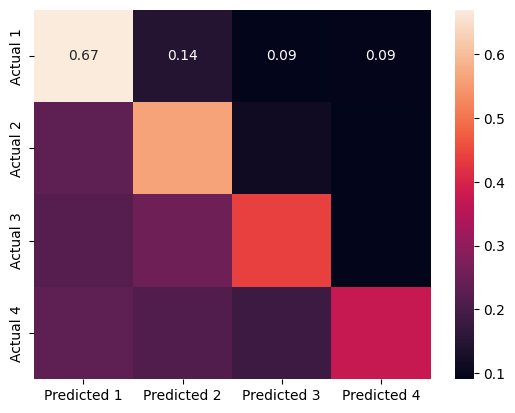

              precision    recall  f1-score   support

           1       0.50      0.67      0.57      1097
           2       0.48      0.56      0.52      1083
           3       0.53      0.44      0.48      1082
           4       0.57      0.37      0.45      1081

    accuracy                           0.51      4343
   macro avg       0.52      0.51      0.51      4343
weighted avg       0.52      0.51      0.51      4343



In [55]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X, Y)
Y_pred=knn.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
cm_np = confusion_matrix.to_numpy()
cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=True, fmt='.2f', xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
      yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()
print(classification_report(Y, Y_pred))

In [53]:
cm_normalized

array([[0.67000912, 0.14494075, 0.0911577 , 0.09389243],
       [0.23268698, 0.56325023, 0.11357341, 0.09048938],
       [0.21996303, 0.25138632, 0.43807763, 0.09057301],
       [0.23219241, 0.21184089, 0.18223867, 0.37372803]])

Accuracy:  0.27858787413660785


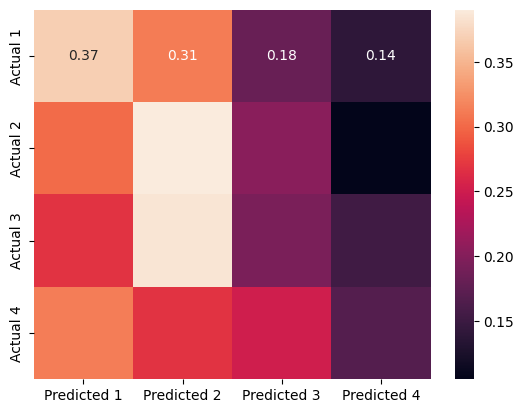

              precision    recall  f1-score   support

           1       0.30      0.37      0.33       337
           2       0.27      0.39      0.32       305
           3       0.25      0.19      0.22       351
           4       0.28      0.17      0.21       310

    accuracy                           0.28      1303
   macro avg       0.28      0.28      0.27      1303
weighted avg       0.28      0.28      0.27      1303



In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)

confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
cm_np = confusion_matrix.to_numpy()
cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True,xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
      yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()
print(classification_report(Y_test, Y_pred))